# Survivalibility on Mt. Everest

## Programming for Data Analysis Project 1

## Author: David Higgins - G00411302

"Getting to the top is optional. Getting down is mandatory."

\- Ed Viesturs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

N = 700

We first import the Mt. Everest Ascent dataset to understand what information is available for mountaineers and to get an idea of the shape of that data.

In [2]:
df = pd.read_csv("Mt_Everest_Ascent_Data.csv")
df.head()

,Peak,Name,Year,Season,Date,Time,Citizenship,Sex,Age,Oxy,Dth,Host
0,EVER,Edmund Percival Hillary,1953,Spr,29-May,11:30,New Zealand,M,33,Y,.,Nepal
1,EVER,Tenzing Norgay,1953,Spr,29-May,11:30,India,M,39,Y,.,Nepal
2,EVER,Hans-Rudolf Von Gunten,1956,Spr,24-May,11:00,Switzerland,M,27,Y,.,Nepal
3,EVER,Juerg P. Marmet,1956,Spr,23-May,14:00,Switzerland,M,28,Y,.,Nepal
4,EVER,Ernst Schmied,1956,Spr,23-May,14:00,Switzerland,M,31,Y,.,Nepal


We can create a Data Series containing just the age values. It's then possible to use the describe() method to find out the mean and standard deviation of the ages of summitters.

In [3]:
ages = df.loc[:,'Age']
ages.describe()

count    10010.000000
mean        35.293906
std          9.314089
min         13.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         80.000000
Name: Age, dtype: float64

Plotting a histogram of the age Data Series gives us an idea of the shape of the distribution. This is often the best indicator of what distribution is appropriate when generating synthetic data.

(array([ 151., 1629., 2943., 2221., 1825.,  832.,  296.,   93.,   17.,
           3.]),
 array([13. , 19.7, 26.4, 33.1, 39.8, 46.5, 53.2, 59.9, 66.6, 73.3, 80. ]),
 <BarContainer object of 10 artists>)

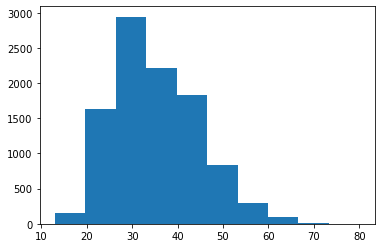

In [4]:
plt.hist(ages, bins=10)

This histogram looks relatively normally distributed. We can try generating a dataset using the mean and standard deviation of the ages Data Series.

[24.37084923 19.15327155 32.27472989 32.41075259 30.45300406 45.91361857
 44.52940408 56.54752409 38.44706851 31.19450914 47.48132559 45.59363056
 29.46799118 35.54309732 39.15140808 31.04742066 35.38531652 18.9095052
 21.91272696 22.69156906 45.83686672 11.5965332  49.76691125 37.48641188
 24.7619263  37.96817792 18.97217098 22.93135732 31.60249341 34.60806632
 26.04334308 48.03515961 30.74019988 49.10030801 28.85360383 24.5931339
 15.96052187 31.74438235 26.38350483 23.75901665 47.92144043 38.1210029
 47.41786939 44.9018522  41.19742621 34.54879198 21.27506434 36.65928601
 44.69585164 52.15203561 37.43845679 36.00409236 64.88601354 41.93655191
 24.4793242  35.80198547 38.18129292 20.04182678 29.21338121 39.1208778
 35.12073177 23.62001583 45.98817931 33.73879901 27.72249088 34.72095418
 43.43363004 34.52588686 33.27208368 27.82385876 42.22364775 35.36758738
 28.57453552 38.80147612 14.99301054 31.34772861 29.59705672 47.47077702
 46.14009905 49.93702262 25.00231122 43.52084633 37.690

(array([ 13.,  41.,  76., 141., 153., 141.,  79.,  42.,  12.,   2.]),
 array([ 9.70088606, 15.2193988 , 20.73791155, 26.2564243 , 31.77493705,
        37.2934498 , 42.81196255, 48.3304753 , 53.84898804, 59.36750079,
        64.88601354]),
 <BarContainer object of 10 artists>)

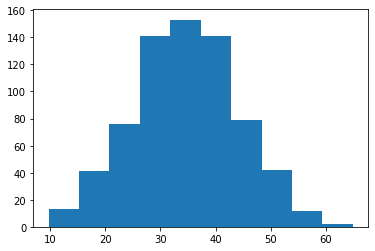

In [5]:
rng = np.random.default_rng()
vals = rng.normal(loc=ages.mean(), scale=ages.std(), size=N)
print(vals)
plt.hist(vals, bins=10)

This appears to be a pretty close approximation of the age Data Series so we will use the variable vals to synthesise age data. Next we consider the probability that a summitter climbed without oxygen. 

In [6]:
noOxygen = df.loc[df.loc[:,'Oxy'] == 'No']
noOxygen.describe()

,Year,Age
count,213.000000,213.000000
mean,2000.680751,35.394366
std,10.407792,6.350187
min,1978.000000,20.000000
25%,1993.000000,31.000000
50%,2001.000000,35.000000
75%,2010.000000,40.000000
max,2019.000000,55.000000


In [7]:
minNoOxAge = noOxygen.Age.mean() - noOxygen.Age.std()*3
maxNoOxAge = noOxygen.Age.mean() + noOxygen.Age.std()*3

print('Minimum age for no oxygen attempt is {} and maximum age is {}.'.format(round(minNoOxAge,2), round(maxNoOxAge,2)))

Minimum age for no oxygen attempt is 16.34 and maximum age is 54.44.


A recent [experiment](https://abcnews.go.com/Health/story?id=2955209&page=1) at Everest Base Camp and the [successful ascent](https://www.nytimes.com/2010/05/20/sports/20climber.html) of a 13 year old show the controversy around the ethics of minors at high altitude.

In [8]:
noOxPotential = df[(df['Age'] >= 18) & (df['Age'] <= 55)].Age.count() 
noOxPotential

9699

We can look at the historical data to get an idea of the probability that a climber will not use oxygen in their attempt. We can count the number of climbers in total who have used oxygen and divide it by the total number of summitters in the appropriate age range determined above.

In [9]:
noOxProbability = noOxygen.Age.count() / noOxPotential
noOxProbability

0.02196102690999072

In [10]:
synNoOx = rng.binomial(1, noOxProbability)
synNoOx

0

Calculate use of oxygen synthetic data

In [11]:
oxUse = []
for a in vals:
    if a >= 18 and a <= 55:
        oxUse.append(synNoOx)
    else:
        oxUse.append(1)
print(oxUse)

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Calculate the probabilities of climbing in each season.

In [12]:
sprCount = df.loc[df.loc[:,'Season'] == 'Spr'].Season.count()
sumCount = df.loc[df.loc[:,'Season'] == 'Sum'].Season.count()
autCount = df.loc[df.loc[:,'Season'] == 'Aut'].Season.count()
winCount = df.loc[df.loc[:,'Season'] == 'Win'].Season.count()

sprProb = sprCount / df.Season.count()
sumProb = sumCount / df.Season.count()
autProb = autCount / df.Season.count()
winProb = winCount / df.Season.count()

seasProbs = [sprProb, sumProb, autProb, winProb]
seasProbs

[0.9692307692307692,
 0.0008991008991008991,
 0.028371628371628373,
 0.0014985014985014985]

Generate a set of seasons chosen by each climber in the synthetic dataset.

In [13]:
seas = ['Spr', 'Sum', 'Aut', 'Win']
seasList = []

for i in range(0, N):
    seasChoice = random.choices(seas, weights=seasProbs)
    seasList.append(seasChoice[0])

print(seasList)

['Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Aut', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Aut', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Aut', 'Win', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Aut', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Aut', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr'

Calculate the probabilities of surviving for summitting in each season with and without oxygen.

In [14]:
for i in seas:
    NoOxDeathProb = round(df[(df['Season'] == i) & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == i) & (df['Oxy'] == 'No')].Season.count(),2)
    print('The historical probability of death after summitting when climbing without oxygen in {} is {}'.format(i,NoOxDeathProb))
    OxDeathProb = round(df[(df['Season'] == i) & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == i) & (df['Oxy'] == 'Y')].Season.count(),2)
    print('The historical probability of death after summitting when climbing with oxygen in {} is {}'.format(i,OxDeathProb))


The historical probability of death after summitting when climbing without oxygen in Spr is 0.06
The historical probability of death after summitting when climbing with oxygen in Spr is 0.01
The historical probability of death after summitting when climbing without oxygen in Sum is 0.0
The historical probability of death after summitting when climbing with oxygen in Sum is 0.0
The historical probability of death after summitting when climbing without oxygen in Aut is 0.13
The historical probability of death after summitting when climbing with oxygen in Aut is 0.02
The historical probability of death after summitting when climbing without oxygen in Win is 0.0
The historical probability of death after summitting when climbing with oxygen in Win is 0.07


Compile list with climber number, ages, season and oxygen use.

In [15]:
synEverestData = []

for i in range(0, N):
    data = []
    if oxUse[i] == 0 and seasList[i] == 'Spr':
        death = rng.binomial(1, df[(df['Season'] == 'Spr') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() / df[(df['Season'] == 'Spr') & (df['Oxy'] == 'No')].Season.count()) 

In [16]:
synEverestData = []

for i in range(0, N):
    data = []
    if oxUse[i] == 0 and seasList[i] == 'Spr':
        death = rng.binomial(1, df[(df['Season'] == 'Spr') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == 'Spr') & (df['Oxy'] == 'No')].Season.count())
        
    elif oxUse[i] == 1 and seasList[i] == 'Spr':
        death = rng.binomial(1, df[(df['Season'] == 'Spr') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == 'Spr') & (df['Oxy'] == 'Y')].Season.count())
        
    elif oxUse[i] == 0 and seasList[i] == 'Sum':
        death = rng.binomial(1, df[(df['Season'] == 'Sum') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == 'Sum') & (df['Oxy'] == 'No')].Season.count())
        
    elif oxUse[i] == 1 and seasList[i] == 'Sum':
        death = rng.binomial(1, df[(df['Season'] == 'Sum') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == 'Sum') & (df['Oxy'] == 'Y')].Season.count())
        
    elif oxUse[i] == 0 and seasList[i] == 'Aut':
        death = rng.binomial(1, df[(df['Season'] == 'Aut') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == 'Aut') & (df['Oxy'] == 'No')].Season.count())
        
    elif oxUse[i] == 1 and seasList[i] == 'Aut':
        death = rng.binomial(1, df[(df['Season'] == 'Aut') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == 'Aut') & (df['Oxy'] == 'Y')].Season.count())
        
    elif oxUse[i] == 0 and seasList[i] == 'Win':
        death = rng.binomial(1, df[(df['Season'] == 'Win') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == 'Win') & (df['Oxy'] == 'No')].Season.count())

    elif oxUse[i] == 1 and seasList[i] == 'Win':
        death = rng.binomial(1, df[(df['Season'] == 'Win') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == 'Win') & (df['Oxy'] == 'Y')].Season.count())

    data = [i, round(vals[i],0), oxUse[i], seasList[i], death]
    synEverestData.append(data)
        
    
print(synEverestData)


[[0, 24.0, 0, 'Spr', 0], [1, 19.0, 0, 'Spr', 0], [2, 32.0, 0, 'Spr', 0], [3, 32.0, 0, 'Spr', 0], [4, 30.0, 0, 'Spr', 0], [5, 46.0, 0, 'Spr', 0], [6, 45.0, 0, 'Spr', 0], [7, 57.0, 1, 'Spr', 0], [8, 38.0, 0, 'Spr', 0], [9, 31.0, 0, 'Spr', 0], [10, 47.0, 0, 'Spr', 0], [11, 46.0, 0, 'Spr', 0], [12, 29.0, 0, 'Spr', 0], [13, 36.0, 0, 'Spr', 0], [14, 39.0, 0, 'Spr', 0], [15, 31.0, 0, 'Spr', 0], [16, 35.0, 0, 'Spr', 1], [17, 19.0, 0, 'Spr', 0], [18, 22.0, 0, 'Spr', 0], [19, 23.0, 0, 'Spr', 1], [20, 46.0, 0, 'Spr', 0], [21, 12.0, 1, 'Spr', 0], [22, 50.0, 0, 'Spr', 0], [23, 37.0, 0, 'Spr', 0], [24, 25.0, 0, 'Spr', 0], [25, 38.0, 0, 'Aut', 0], [26, 19.0, 0, 'Spr', 0], [27, 23.0, 0, 'Spr', 0], [28, 32.0, 0, 'Spr', 0], [29, 35.0, 0, 'Spr', 0], [30, 26.0, 0, 'Spr', 0], [31, 48.0, 0, 'Spr', 0], [32, 31.0, 0, 'Spr', 0], [33, 49.0, 0, 'Spr', 0], [34, 29.0, 0, 'Spr', 1], [35, 25.0, 0, 'Spr', 1], [36, 16.0, 1, 'Aut', 0], [37, 32.0, 0, 'Spr', 0], [38, 26.0, 0, 'Spr', 0], [39, 24.0, 0, 'Spr', 0], [40, 48.0

In [17]:
deaths2 = []

for i in range(0, 700):
    deaths2.append(synEverestData[i][4])
print(sum(deaths2)/700)

0.06142857142857143
